# Preliminary operations

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
from google.colab import drive
from shutil import copyfile
plt.rcParams['figure.figsize'] = [15,5]

In [3]:
drive.mount('/content/gdrive', force_remount = True)
copyfile('gdrive/My Drive/DSIM/E04/Bicocca1.jpg', 'Bicocca1.jpg')
copyfile('gdrive/My Drive/DSIM/E04/Bicocca2.jpg', 'Bicocca2.jpg')

Mounted at /content/gdrive


'Bicocca2.jpg'

# Descriptors

Create SIFT, read images and extract descriptors.

In [4]:
sift = cv.SIFT_create()

In [14]:
im1 = cv.imread('Bicocca1.jpg', cv.IMREAD_GRAYSCALE)
im2 = cv.imread('Bicocca2.jpg', cv.IMREAD_GRAYSCALE)

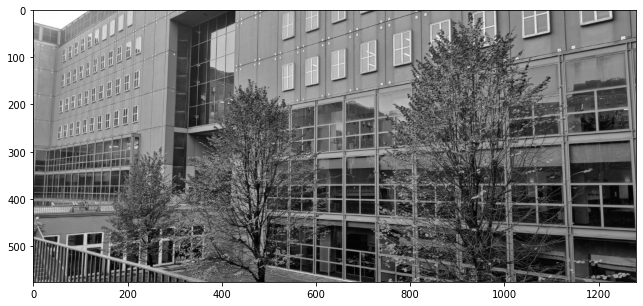

In [16]:
plt.imshow(im1, cmap = 'gray')

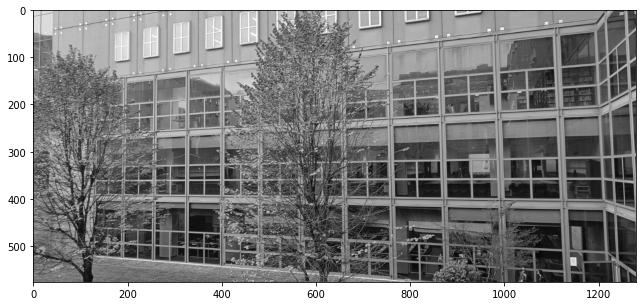

In [17]:
plt.imshow(im2, cmap = 'gray')

In [18]:
(kpts1, descriptors1) = sift.detectAndCompute(im1, None)
(kpts2, descriptors2) = sift.detectAndCompute(im2, None)

Match descriptors.

In [19]:
bf = cv.BFMatcher.create(crossCheck = True)
matches = bf.match(descriptors1, descriptors2)

# Homography matrix

Create homography matrix through RANSAC method, using the coordinates stored in *matches* to find the correspondences between the two sets of keypoints.

In [20]:
def myHomography(kpts1, kpts2, matches):
  # Create two numpy arrays with 2 dimensions (i.e. matrices)
  # We'll use them to store the coordinates
  src_pts = np.zeros((len(matches), 2), dtype = float)
  dst_pts = np.zeros((len(matches), 2), dtype = float)
  # For each match, search the respective coordinates and store
  # in the previous matrices
  for i in range(len(matches)):
    src_pts[i] = kpts1[matches[i].queryIdx].pt
    dst_pts[i] = kpts2[matches[i].trainIdx].pt
  # Now, compute homography matrix with RANSAC method
  H, mask = cv.findHomography(src_pts, dst_pts, method = cv.RANSAC, ransacReprojThreshold = 4)
  return H

In [21]:
H = myHomography(kpts1, kpts2, matches)

Let's print the homography matrix.

In [22]:
H

array([[ 1.71304865e+00,  1.34730722e-02, -6.87908769e+02],
       [ 1.63275114e-01,  1.46625008e+00, -1.95085004e+02],
       [ 5.66723020e-04,  4.45222018e-05,  1.00000000e+00]])

# Warp perspective

Now, we apply the homography matrix to the second image.

In [27]:
def myWarp(im2, H):
  return cv.warpPerspective(im2, H, (im1.shape[1], im1.shape[0]), flags = cv.WARP_INVERSE_MAP)

Let's see the result.

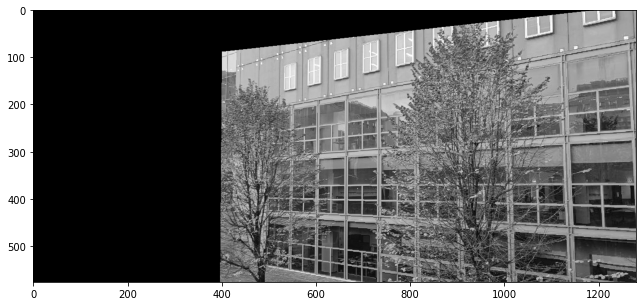

In [28]:
im3 = myWarp(im2, H)
plt.imshow(im3, cmap = 'gray'); plt.show()

# Collage

Finally, we merge the two images in order to obtain the panorama.

In [29]:
def myCollage(im3, im1):
  im3[0:im1.shape[0], 0:im1.shape[1]] = im1
  return im3

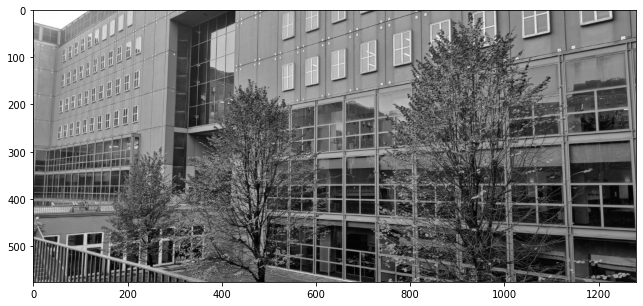

(<matplotlib.image.AxesImage at 0x7f607b5162d0>, None)

In [30]:
im4 = myCollage(im3, im1)
plt.imshow(im4, cmap = 'gray'), plt.show()

The panoramic image seems sufficiently "homogeneous".